In [3]:
from datasets import load_dataset

voxpopuli_english = load_dataset("facebook/voxpopuli", "en", streaming=True)

In [7]:
voxpopuli_head = voxpopuli_english["train"].take(3)
voxpopuli_array = list(voxpopuli_head)

In [8]:
audio_sample = voxpopuli_array[-1]
audio_sample

{'audio_id': '20180314-0900-PLENARY-13-en_20180314-16:03:18_3',
 'language': 0,
 'audio': {'path': 'train_part_0/20180314-0900-PLENARY-13-en_20180314-16:03:18_3.wav',
  'array': array([ 0.00201416, -0.00344849, -0.00460815, ...,  0.00076294,
          0.00198364,  0.0012207 ]),
  'sampling_rate': 16000},
 'raw_text': 'In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,',
 'normalized_text': 'in order to increase the preparedness at national and eu level the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation cooperation between member states economic cross border and cross sector collaboration',
 'gender': 'female',
 'speaker_id': 'None',
 'is_gold_transcript': True,
 'accent': 'None'}

In [11]:
audio_sample.keys()

dict_keys(['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'])

In [14]:
audio_sample['audio']['array']

array([ 0.00201416, -0.00344849, -0.00460815, ...,  0.00076294,
        0.00198364,  0.0012207 ])

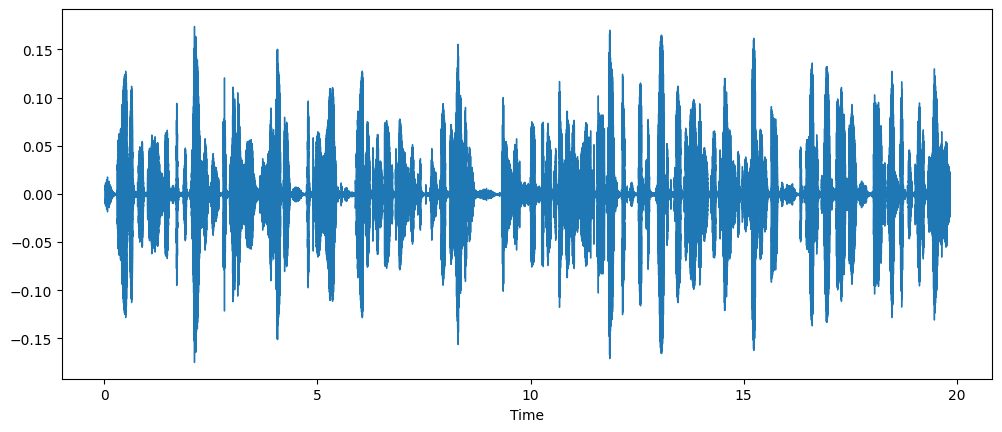

In [15]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(audio_sample['audio']['array'], sr=16000)

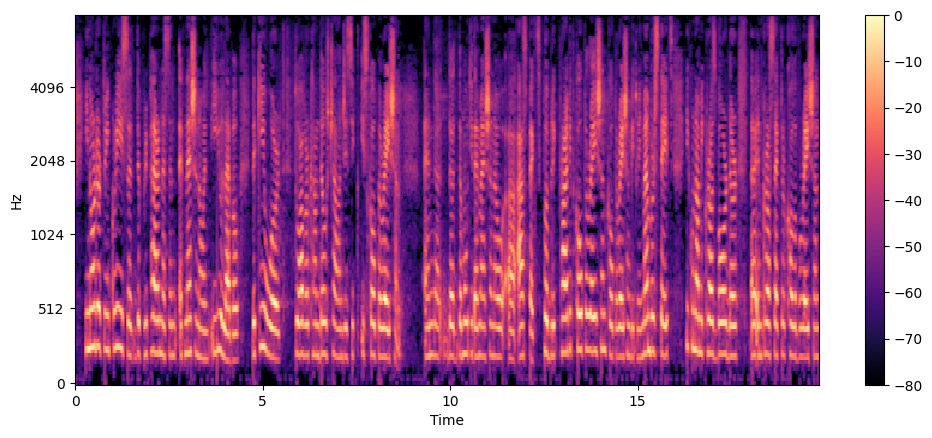

In [16]:
import numpy as np

S = librosa.feature.melspectrogram(y=audio_sample['audio']['array'], sr=16000, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=16000, fmax=8000)
plt.colorbar()

In [18]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
asr(audio_sample['audio']['array'])

{'text': 'IN ORDER TO INCREASE THE PREPARENESSEN ATNATIONAL AND EVIL LEVEL THE KEY WORD TO OVERCOME THOSE CHALLENGES IC ISCOPERATION AND  THETHE MOOTI DIMENSION OF A ASPECTS PUBLIC PRIVATE COPERATION COPERATION BETWEEN MEMBER STATES ECONOMI CROSS BORDER INCROSSECTOR COLOPERATION'}